<a href="https://colab.research.google.com/github/gulabpatel/Statistics/blob/main/Data_distriution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmlb

#Import Library

In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats as st
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pmlb import fetch_data

#Read Data

In [3]:
data = fetch_data('adult')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,1
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,1
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,1
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,1
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,4,215419.0,9,13.0,0,10,1,4,0,0.0,0.0,36.0,39,1
48838,64.0,0,321403.0,11,9.0,6,0,2,2,1,0.0,0.0,40.0,39,1
48839,38.0,4,374983.0,9,13.0,2,10,0,4,1,0.0,0.0,50.0,39,1
48840,44.0,4,83891.0,9,13.0,0,1,3,1,1,5455.0,0.0,40.0,39,1


**Check whether there is any missing value in our data**

In [4]:
#df_placement.describe()
data.isnull().any()  

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
target            False
dtype: bool

Distribution of data?


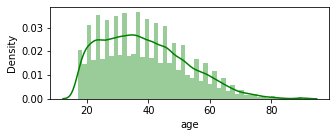

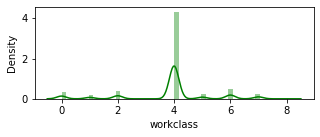

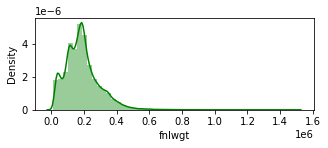

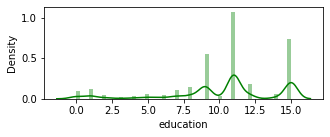

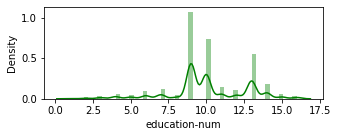

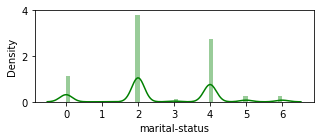

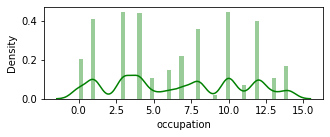

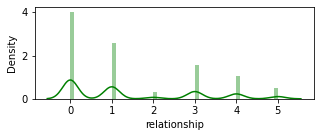

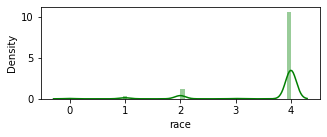

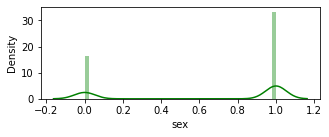

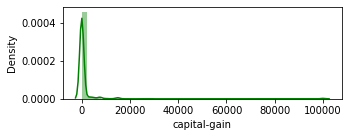

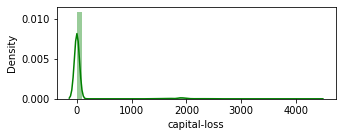

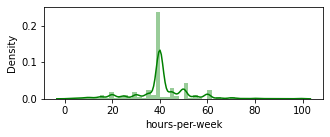

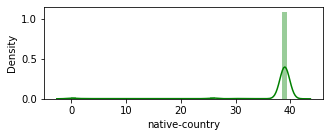

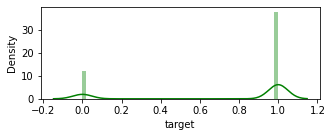

In [5]:
#plt.figure(figsize=(10,10))
features = list(data.columns)
for i in enumerate(features):
  plt.figure(figsize=(5,30))
  plt.subplot(data.shape[1],1,i[0]+1)
  sns.distplot(data.loc[:,i[1]], bins=50, color="g")
  plt.show()

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

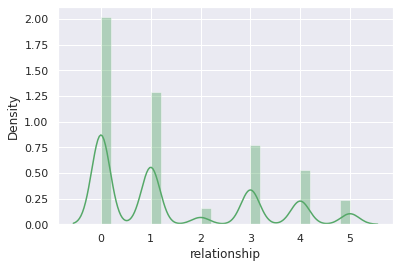

In [7]:
import seaborn as sns; sns.set()
plt.figure(figsize=(15,15))
fig, ax = plt.subplots()
sns.distplot(data.loc[:,'relationship'], bins=25, color="g", ax=ax)
plt.show()

#Continuous Distribution

In [10]:
def get_best_cont_distribution(data):
    dist_names = ['beta','cauchy','chi','chi2','expon','gamma','gumbel_r','laplace','lognorm','norm','pareto','t','triang','uniform','weibull_min','weibull_max']
    dist_results = []
    params = {}
    for dist_name in dist_names: 
        dist = getattr(st, dist_name)   ##from scipy import stats as st
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit distribution and its p value
    print()
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))
    print()
    return best_dist, best_p, params[best_dist]

In [11]:
get_best_cont_distribution(data['age'])

p value for beta = 6.450744257941582e-60
p value for cauchy = 0.0
p value for chi = 0.0
p value for chi2 = 2.102348488210109e-109
p value for expon = 0.0
p value for gamma = 2.0939153891306407e-109
p value for gumbel_r = 1.079697710045403e-93
p value for laplace = 4.56253192166453e-296
p value for lognorm = 2.1178226743621387e-88
p value for norm = 1.183484192842924e-169
p value for pareto = 0.0
p value for t = 1.6092975298433733e-169
p value for triang = 0.0
p value for uniform = 0.0
p value for weibull_min = 0.0
p value for weibull_max = 7.12163933488832e-95

Best fitting distribution: beta
Best p value: 6.450744257941582e-60
Parameters for the best fit: (1.468250776456375, 3.7326546384194828, 16.58801810784547, 77.66290897379534)



('beta',
 6.450744257941582e-60,
 (1.468250776456375, 3.7326546384194828, 16.58801810784547, 77.66290897379534))

-----------------------------